<a href="https://colab.research.google.com/github/AlfredoMijares/DeepLearning/blob/main/ExposicionRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competitive Multi-Agent

Multi-agent systems can solve scientific issues related to complex systems that are difficult or impossible for a single agent to solve through mutual collaboration and cooperation optimization. In a multi-agent system, agents with a certain degree of autonomy generate complex interactions due to the correlation and coordination, which is manifested as cooperative/competitive behavior.

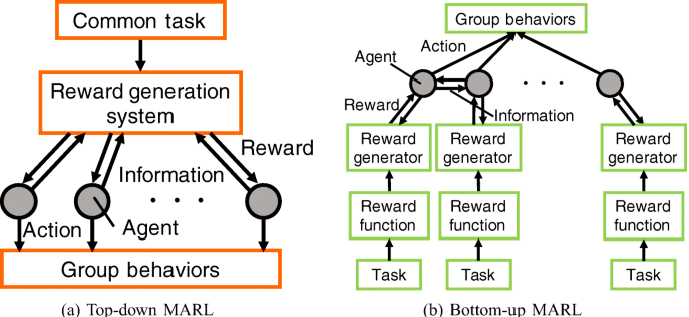

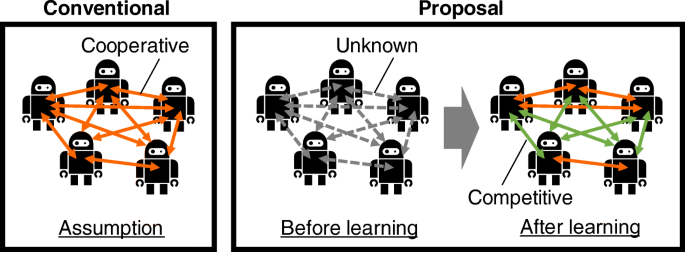

# Juego piedra, Papel y tijera.

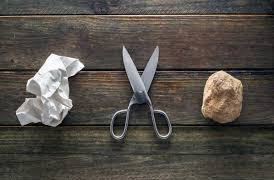

In [1]:
# prompt: Multi-Agent Code Generation for Competitive Problem

import random

class Agent:
  def __init__(self, name):
    self.name = name
    self.score = 0

  def make_move(self, game_state):
    # Implement agent's logic here to make a move based on the game state
    # This could be a random move, a rule-based move, or a learned policy
    # Return the chosen move
    move = random.randint(0, 2)  # Example: Random move from 0 to 2
    return move

  def update_score(self, reward):
    self.score += reward

# Example game loop for a simple competitive problem (Rock, Paper, Scissors)
def play_game(agent1, agent2, num_rounds):
  for _ in range(num_rounds):
    move1 = agent1.make_move(None)  # Assuming game state is not relevant for this example
    move2 = agent2.make_move(None)

    if move1 == move2:
      # Draw
      pass
    elif (move1 == 0 and move2 == 1) or \
         (move1 == 1 and move2 == 2) or \
         (move1 == 2 and move2 == 0):
      # Agent 2 wins
      agent2.update_score(1)
    else:
      # Agent 1 wins
      agent1.update_score(1)

  if agent1.score > agent2.score:
    print(f"{agent1.name} wins!")
    print(agent1.score)
    print(f"{agent2.name} Loser!")
    print(agent2.score)
  elif agent2.score > agent1.score:
    print(f"{agent2.name} wins!")
    print(agent2.score)
    print(f"{agent1.name} Loser!")
    print(agent1.score)
  else:
    print("It's a draw!")


# Create agents
agent1 = Agent("Agent A")
agent2 = Agent("Agent B")

# Play the game
play_game(agent1, agent2, 1000000)

# You can expand this code to create more complex agents,
# implement different game logic, and add features like training and learning.

Agent A wins!
333519
Agent B Loser!
333159


Aquí tienes un ejemplo básico de un código en Python que representa un entorno de aprendizaje por refuerzo competitivo entre dos agentes utilizando el algoritmo Q-learning. Este ejemplo básico implica que los dos agentes están tratando de maximizar su propia recompensa mientras compiten entre sí.

Primero, asegúrate de tener instalado numpy, lo cual puedes hacer con el siguiente comando:


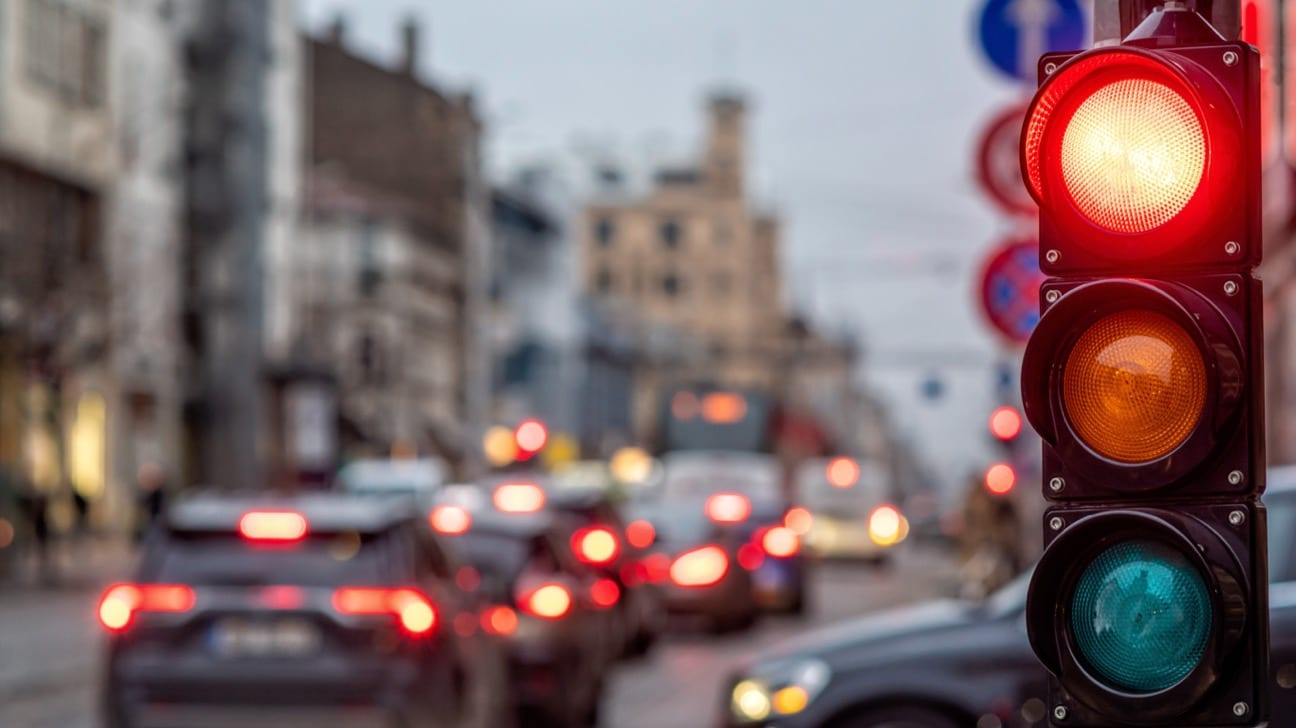

In [ ]:
import numpy as np
import random

# Parámetros para el entorno
num_states = 5  # Número de estados
num_actions = 2  # Número de acciones posibles
num_episodes = 1000  # Número de episodios de entrenamiento
learning_rate = 0.1  # Tasa de aprendizaje
discount_factor = 0.9  # Factor de descuento
epsilon = 0.1  # Tasa de exploración

# Inicializar las tablas Q para dos agentes
Q_agent1 = np.zeros((num_states, num_actions))
Q_agent2 = np.zeros((num_states, num_actions))

# Función para elegir la acción (ε-greedy)
def choose_action(state, Q_table):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, num_actions - 1)  # Acción aleatoria
    else:
        return np.argmax(Q_table[state])  # Acción basada en la tabla Q

# Simulación del entorno
def step(state, action1, action2):
    # Suponemos que el estado se incrementa al tomar decisiones
    next_state = (state + 1) % num_states

    # Definimos recompensas
    if action1 == action2:
        reward1 = -1  # Penalización si ambos eligen la misma acción
        reward2 = -1
    else:
        reward1 = 1  # Recompensa si elige diferente
        reward2 = 1

    return next_state, reward1, reward2

# Entrenamiento de los agentes
for episode in range(num_episodes):
    state = random.randint(0, num_states - 1)  # Estado inicial

    while True:
        action1 = choose_action(state, Q_agent1)
        action2 = choose_action(state, Q_agent2)

        next_state, reward1, reward2 = step(state, action1, action2)

        # Actualizar las tablas Q
        Q_agent1[state, action1] += learning_rate * (reward1 + discount_factor * np.max(Q_agent1[next_state]) - Q_agent1[state, action1])
        Q_agent2[state, action2] += learning_rate * (reward2 + discount_factor * np.max(Q_agent2[next_state]) - Q_agent2[state, action2])

        state = next_state
        if state == 0:  # Fin del episodio cuando regresamos al estado inicial
            break

# Resultados
print("Tabla Q del Agente 1:")
print(Q_agent1)
print("Tabla Q del Agente 2:")
print(Q_agent2)


Tabla Q del Agente 1:
[[8.83003533 3.01680365]
 [8.93538945 3.88477331]
 [6.12875405 8.85277973]
 [6.31662507 8.84053425]
 [6.56557963 8.80231965]]
Tabla Q del Agente 2:
[[2.70107875 8.92811189]
 [5.32177029 8.84904502]
 [8.705614   6.5665502 ]
 [8.96287176 6.13315662]
 [8.83171671 6.52388647]]


Explicación
Entorno: Este entorno tiene 5 estados y 2 acciones.
Q-Learning: Cada agente mantiene su propia Q-table, que se actualiza en cada paso del episodio.
Política Epsilon-Greedy: Se utiliza para seleccionar acciones, equilibrando entre exploración y explotación.
Recompensas: Los agentes reciben recompensas basadas en si eligen la misma acción o no.
Episodios: Se simulan múltiples episodios hasta alcanzar una condición de finalización.
Este es un esquema básico y se puede expandir en complejidad y características según sea necesario para tus requerimientos específicos. Puedes modificar los estados, acciones, recompensas y la estructura general para ajustarlo a un problema particular que quieras resolver.

In [ ]:
# prompt: Competitive Multi-Agent complex

import random

class Agent:
    def __init__(self, id, initial_resources):
        self.id = id
        self.resources = initial_resources
        self.score = 0

    def make_decision(self, environment):
        # This is a placeholder for the agent's decision-making logic.
        # A real agent would use some strategy or algorithm to determine
        # what actions to take based on its current state and the environment.
        action = random.choice(["cooperate", "defect"])
        return action

    def update_score(self, reward):
        self.score += reward


class Environment:
    def __init__(self, num_agents, initial_resources):
        self.num_agents = num_agents
        self.agents = [Agent(i, initial_resources) for i in range(num_agents)]
        self.resource_pool = 0  # Initial pool of shared resources

    def step(self):
        actions = [agent.make_decision(self) for agent in self.agents]

        # Reward calculation based on agent actions
        # (This is where the complex interaction and competition logic resides.)
        rewards = self.calculate_rewards(actions)

        # Update agent scores
        for i, agent in enumerate(self.agents):
            agent.update_score(rewards[i])

        # Update environment state (resource pool, etc.)
        # (This could involve resource depletion, resource generation, etc.)
        # self.update_environment()

        return rewards

    def calculate_rewards(self, actions):
        # This is a placeholder for complex reward calculation.
        # For example:
        # - Cooperation could lead to shared rewards.
        # - Defection could lead to individual gains but potential collective loss.
        # - Resource depletion/constraints could impact rewards.
        rewards = []
        for i in range(self.num_agents):
            if actions[i] == "cooperate":
                reward = 1
            else:
                reward = 2
            rewards.append(reward)

        return rewards


# Example Usage
num_agents = 3
initial_resources = 100
env = Environment(num_agents, initial_resources)

for i in range(10):  # Run for 10 steps
    rewards = env.step()
    print(f"Step {i+1}: Rewards {rewards}")

# Analyze final agent scores
for agent in env.agents:
    print(f"Agent {agent.id}: Score {agent.score}")


Step 1: Rewards [2, 1, 2]
Step 2: Rewards [1, 2, 2]
Step 3: Rewards [2, 1, 2]
Step 4: Rewards [2, 2, 1]
Step 5: Rewards [2, 1, 2]
Step 6: Rewards [1, 2, 1]
Step 7: Rewards [2, 2, 2]
Step 8: Rewards [1, 2, 2]
Step 9: Rewards [2, 2, 2]
Step 10: Rewards [2, 1, 2]
Agent 0: Score 17
Agent 1: Score 16
Agent 2: Score 18


In [ ]:
# prompt: Competitive Multi-Agent mega complex

import random

class Agent:
  def __init__(self, name, resource_limit):
    self.name = name
    self.resources = random.randint(1, resource_limit)
    self.score = 0

  def act(self, environment):
    # Implement agent's logic here based on the environment
    # (e.g., explore, exploit, cooperate, compete)
    action = self.random_action()
    return action

  def random_action(self):
    # Example of a random action
    actions = ["explore", "exploit", "cooperate", "compete"]
    return random.choice(actions)


class Environment:
  def __init__(self, num_agents, resource_limit):
    self.agents = [Agent(f"Agent_{i}", resource_limit) for i in range(num_agents)]
    self.resources_available = resource_limit * num_agents

  def step(self):
    for agent in self.agents:
      action = agent.act(self)
      # Process agent's action and update environment
      if action == "explore":
        reward = random.randint(1, 5)
        agent.resources += reward
        self.resources_available -= reward
      elif action == "exploit":
        if agent.resources > 0:
          reward = random.randint(1, 3)
          agent.score += reward
          agent.resources -= 1
          self.resources_available += 1
      elif action == "cooperate":
        # Implement cooperation logic
        pass
      elif action == "compete":
        # Implement competition logic
        pass

    # Update environment based on agent actions

  def run(self, num_steps):
    for _ in range(num_steps):
      self.step()


# Example usage
env = Environment(num_agents=5, resource_limit=10)
env.run(num_steps=10)

# Display agent scores
for agent in env.agents:
  print(f"{agent.name}: Score = {agent.score}, Resources = {agent.resources}")

Agent_0: Score = 2, Resources = 5
Agent_1: Score = 2, Resources = 7
Agent_2: Score = 0, Resources = 11
Agent_3: Score = 14, Resources = 5
Agent_4: Score = 3, Resources = 0
